In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
Chest_CT_IMG_SIZE = 227
Chest_CT_IMG_CHANNEL = 3
Chest_CT_BATCH_SIZE = 64
Chest_CT_COLOR_MODE = 'rgb'

In [6]:
Chest_CT_PATH = "F:\Studies\Third_year\Computer_vision\Project\ProjectCode\Dataset\Data"
Chest_CT_CLASSNAMES = sorted(os.listdir(Chest_CT_PATH + '/train'))

In [7]:
Chest_CT_CLASSNAMES

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [8]:
Chest_CT_train_set = image_dataset_from_directory(
    Chest_CT_PATH + '/train',
    labels='inferred',
    label_mode='categorical',
    class_names=Chest_CT_CLASSNAMES,
    color_mode=Chest_CT_COLOR_MODE,
    batch_size=Chest_CT_BATCH_SIZE,
    image_size=(Chest_CT_IMG_SIZE, Chest_CT_IMG_SIZE),
    interpolation='bilinear'
)

Found 613 files belonging to 4 classes.


In [9]:
Chest_CT_dev_set = image_dataset_from_directory(
    Chest_CT_PATH + '/valid',
    labels='inferred',
    label_mode='categorical',
    class_names=Chest_CT_CLASSNAMES,
    color_mode=Chest_CT_COLOR_MODE,
    batch_size=Chest_CT_BATCH_SIZE,
    image_size=(Chest_CT_IMG_SIZE, Chest_CT_IMG_SIZE),
    interpolation='bilinear'
)

Found 72 files belonging to 4 classes.


In [10]:
Chest_CT_test_set = image_dataset_from_directory(
    Chest_CT_PATH + '/test',
    labels='inferred',
    label_mode='categorical',
    class_names=Chest_CT_CLASSNAMES,
    color_mode=Chest_CT_COLOR_MODE,
    batch_size=Chest_CT_BATCH_SIZE,
    image_size=(Chest_CT_IMG_SIZE, Chest_CT_IMG_SIZE),
    interpolation='bilinear'
)

Found 315 files belonging to 4 classes.


In [11]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(227,227,3))

for layer in vgg.layers:
  layer.trainable = False

flat = Flatten() (vgg.layers[-1].output)
fc1 = Dense(1024, activation='relu') (flat)
output = Dense(4, activation='softmax') (fc1)
model_bt1 = Model(inputs=vgg.inputs, outputs=output)

In [12]:
optimizer = Adam()
loss = CategoricalCrossentropy()

model_bt1.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

history = model_bt1.fit(Chest_CT_train_set,
                    epochs=5,
                    validation_data=Chest_CT_dev_set)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.3449 - loss: 130.6576 - val_accuracy: 0.5000 - val_loss: 46.0934
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.7412 - loss: 18.6092 - val_accuracy: 0.7917 - val_loss: 8.2931
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.9119 - loss: 3.5826 - val_accuracy: 0.7500 - val_loss: 13.4984
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9684 - loss: 0.7895 - val_accuracy: 0.8056 - val_loss: 8.0477
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.9761 - loss: 0.5689 - val_accuracy: 0.8472 - val_loss: 7.5993


In [14]:
import keras

In [15]:
def plot_accuracy_loss(history: keras.callbacks.History):
    measures = ['accuracy', 'loss']
    #tạo subplot gồm 1 hàng, 2 cột
    fix, ax = plt.subplots(1, 2, figsize=(10,5))

    for i in range(2):
        ax[i].plot(history.history[measures[i]])
        ax[i].plot(history.history[f'val_{measures[i]}'])
        ax[i].set_title(f'MODEL {measures[i].upper()}', fontweight='bold', 
                fontsize=15, c='red')
        ax[i].set_xlabel('Epoch', fontweight='bold',
                fontsize=12)
        ax[i].set_ylabel(measures[i], fontweight='bold',
                fontsize=12)
        ax[i].legend(['train', 'val'], loc='upper left')
        ax[i].tick_params(axis='x', rotation=45)  
    plt.show()

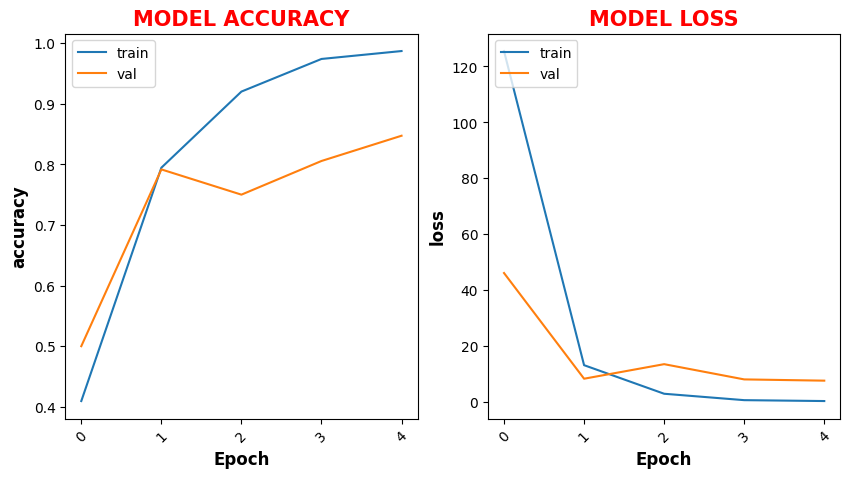

In [16]:
plot_accuracy_loss(history)

In [17]:
y_pred_total = []
y_true = []

for img, label in Chest_CT_test_set:
  y_pred = model_bt1.predict(img)
  y_pred_total += [np.argmax(i, axis=-1) for i in y_pred]
  y_true += [np.argmax(i, axis=-1) for i in label]

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step


In [18]:
print(f'Accuracy: {accuracy_score(y_true, y_pred_total)}')
print(f"Precision: {precision_score(y_true, y_pred_total, average='macro')}")
print(f"Recall: {recall_score(y_true, y_pred_total, average='macro')}")
print(f"F1 macro: {f1_score(y_true, y_pred_total, average='macro')}")

Accuracy: 0.8603174603174604
Precision: 0.8668045343137255
Recall: 0.8868736383442266
F1 macro: 0.8707035071184552
